## Introduction

Through statistics you can make sense of data. In today's world a number of algorithms exploit the statistical structure of data in order to carry out analysis. In this practical, you will learn basic statistical concepts like, population, sample, difference between correlation and causation, centrality measures, sample distribution types and much more. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

#----------------------------------------------------------------------\n",
# Function to generate markdown output\n",
# Ref: https://stackoverflow.com/a/32035217\n",
def printmd(string):
    display(Markdown(string))

## Populations and Samples

In statistics, a population is all the things that we are investigating, be they people, animals, objects or events. Since it is not feasible to collect data about a whole population, a representative sample is generally used to estimate the population parameters.

![](./images/s.png)

For the sample to provide good data that allows us to estimate the population parameters accurately, the sample of people selected to participate in the survey must be representative of the population. This is best achieved using a **random sample** rather than a convenience sample.

In a random sample, each individual in the population being studied has the same chance of being picked to participate and their selection would in no way affect the chances of other individuals in the population being chosen to participate as well.

A random sample is thus less likely to be biased and more likely to be representative of the population.

## Parameters vs Statistics

The properties of a population such as mean value, are know as population parameters, while the respective estimates computed from a sample are called sample statistics.

The mean of a population is represented by $\mu$ (read as mu) and the standard deviation by $\sigma$ (read as sigma), while the equivalent sample statistics are represented by $\bar x$ (read as x bar) and $s$.

Good estimates will be close to the population parameters, however they will never be 100% accurate. The difference between the population mean and the sample mean is called the sampling error.

$$\text{sampling error} = \mu - \bar x$$

In the code below we simulate 500 humans and their ages using a normal distribution with the mean age set to 45, and then uniformly sample 10, 100 and 200 ages from this population. The sampling error decreases the larger the sample size is. but you can see that even with a small sample size of 10, the mean estimate is quite close to the real population mean.

You can experiment by changing the population and sample sizes and notice the effect this has on the sampling error.

In [2]:
def sample_x(source, n_samples, verbose=True):
    if verbose: print("Sampling {0} humans from the population. Sample statistics are the following:".format(n_samples))
    samples = np.random.choice(source, size=n_samples, replace=False)
    if verbose: print(stats.describe(samples))
    if verbose: print("Sampling error: {0:.2f}\n".format(np.mean(source) - np.mean(samples)))
    return samples

mu, sigma, samples = 45, 10, 500
ages = np.random.normal(mu, sigma, samples)
print("Population of {0} humans and their corresponding ages. Population parameters are the following:".format(samples))
print(stats.describe(ages))
print("\n")

samples_10 = sample_x(ages, 10)
samples_100 = sample_x(ages, 100)
samples_200 = sample_x(ages, 200)

Population of 500 humans and their corresponding ages. Population parameters are the following:
DescribeResult(nobs=500, minmax=(17.974069986181185, 75.15504613271861), mean=45.28953725220311, variance=93.30233601289464, skewness=0.07114868357430158, kurtosis=0.21841569082657175)


Sampling 10 humans from the population. Sample statistics are the following:
DescribeResult(nobs=10, minmax=(36.57579529799873, 68.72091288368645), mean=49.059033957992895, variance=81.69704507216677, skewness=0.8843380582184189, kurtosis=0.3199837646624868)
Sampling error: -3.77

Sampling 100 humans from the population. Sample statistics are the following:
DescribeResult(nobs=100, minmax=(17.974069986181185, 75.15504613271861), mean=45.263036337495485, variance=91.144717389676, skewness=-0.08288351949531489, kurtosis=1.1885129223846294)
Sampling error: 0.03

Sampling 200 humans from the population. Sample statistics are the following:
DescribeResult(nobs=200, minmax=(17.974069986181185, 70.69319617701531), 

### Visualise Relationships

Our brains are more adept at processing visual information and so we find it much easier to see relationships graphically rather than by looking at a bunch of numbers. For example, ten people were asked how much they slept before an exam and the following where the results collected. Assume this was done as part of research into whether sleep has an effect on exam performance.

In [3]:
sleep_vs_memory = pd.DataFrame({'Sleeping time (hours)' : pd.Series([7,8,6,5,6,7,6.5,8.5,6.5,7]),
                                'Exam score' : pd.Series([86,70,56,56,70,80,72,91,81,86])})
sleep_vs_memory.head(n=10)

,Sleeping time (hours),Exam score
0,7.0,86
1,8.0,70
2,6.0,56
3,5.0,56
4,6.0,70
5,7.0,80
6,6.5,72
7,8.5,91
8,6.5,81
9,7.0,86


Even though the table contains only ten data points, it is not easy to reach a conclusion whether sleep affects exam performance. However, if we plot these data points using a scatter plot, any correlation will become apparent instantly.

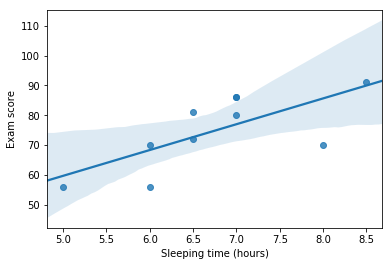

In [6]:
fix, ax = plt.subplots(1,1)
ax = sns.regplot(x="Sleeping time (hours)", y="Exam score", data=sleep_vs_memory)

**Note:** The above plot also includes a fitted linear regression model with shaded confidence interval, clearly showing a postive correlation between the independent variable, sleeping time in hours, and the dependent variable, i.e. exam score.

It is evident from the scatter plot above, even without the fitted linear regression model line, that there seems to be a positive association between exam performance and the longer one sleeps the night before the test. However, we need to be careful, since **correlation does not imply causation**.

### Correlation vs Causation

This one is a tricky one and it trips a lot of people up, even experienced ones. In the sleeping hours vs exam performance, the positive correlation shows that people who slept more the night before the temporal memory test achieved a better score. However, one cannot conclusively say that sleeping more improves exam performance. The positive correlation could be present due to some extraneous factor, such as hidden/latent/lurking variables, we do not know about yet or are not considering in the study. For instance, perhaps people who sleep more are more organized and so with better time management they find the time to sleep more AND study more, hence, better exam performance.

Figuring out causation, i.e. what really is affecting the outcome (in this case, exam performance), is very hard, especially in studies involving many variables, for example, clinical studies.

#### How to show causation

Determining causation is quite challenging. The only way to show causation is to conduct controlled experiments. As the name implies, in a controlled experiment the aim is to try and control as many of the variables that we know of and only influence one variable, say administering a drug. In this manner, if the outcome changes we can be sure that the variable we controlled is the causation.

![](./images/ed.png)

#### Types of variables

In the previous example, the number of hours slept, plotted on the x-axis, is called the **independent variable or predictor variable**, while the temporal memory score, plotted on the y-axis, is called the **outcome or dependent variable**.

## Visualising Data

### Frequency of Data

Often, when we collect a sample of data we would need to count how many responses we received for each particular category, if the data is categorical, or for each value, if the data is numerical. Different visualisations are used to represent the frequencies of data, depending on whether it is categorical (qualitative) or numerical (quantitative).

#### Categorical Data

Categorical data is qualitative data that falls into one out of a finite set of categories, for instance, eye colour or car brand. Categorical data is further divided into **ordinal** variables, i.e. those that can be ordered according to some rank, say grade, and **nominal** variables, i.e. those such as eye colour for which ranking does not make sense.

For categorical data, bar graphs with a bar for each possible value in the category are used.

#### Bar Graphs for Categorical Data

In this example, let us imagine we collected survey data from 50 students enrolled in a particular course, and one of the questions was about their home country, a nominal categorical variable. The code below will visualise this categorical variable using a bar graph to allow us to quickly figure out which home country is the commonest for our sample students. If the sample students were selected randomly and the sample is of sufficient size and representative, this should give us a clear idea about home countries for the wider student cohort, i.e. the student population.

In [7]:
student_home_countries = pd.Series(["New Zealand","China","New Zealand","New Zealand","New Zealand",
                                    "Canada","China","Japan","Mexico","New Zealand",
                                    "China","Germany","India","India","USA",
                                    "New Zealand","New Zealand","USA","China","New Zealand",
                                    "India","Japan","England","India","New Zealand",
                                    "England","India","China","Mexico","New Zealand",
                                    "Mexico","New Zealand","Canada","Pakistan","India",
                                    "Japan","China","New Zealand","USA","Germany",
                                    "China","India","India","China","New Zealand",
                                    "Germany","Japan","China","New Zealand","USA"],
                                   name="Student Home Countries")

printmd("**Counts**")
print(student_home_countries.value_counts())

**Counts**

New Zealand    14
China           9
India           8
USA             4
Japan           4
Germany         3
Mexico          3
Canada          2
England         2
Pakistan        1
Name: Student Home Countries, dtype: int64


Let's visualize the counts:

[Text(0, 0, 'New Zealand'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'India'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Pakistan')]

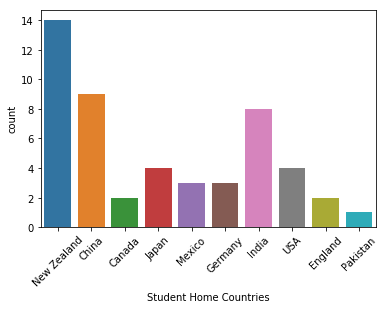

In [8]:
p=sns.countplot(x=student_home_countries);
p.set_xticklabels(p.get_xticklabels(), rotation=45)

##### Relative Frequencies

Relative frequencies are computed by dividing each category count by the number of samples. So they range between 0 and 1, and sum up to 1. They can thus be used to represent the probability of each category.

In [9]:
print(student_home_countries.value_counts(normalize=True))

New Zealand    0.28
China          0.18
India          0.16
USA            0.08
Japan          0.08
Germany        0.06
Mexico         0.06
Canada         0.04
England        0.04
Pakistan       0.02
Name: Student Home Countries, dtype: float64


#### Numerical Data

Numerical data is quantitative data such as age, height, income and so on. Numerical data can be split into **discrete** variables, i.e. variables that take values from a set of whole numbers, such as number of shirts bought, and **continuous** variables, i.e. variables that take values from a range of real values, such as height or temperature.

For numerical data histograms are used.

#### Histograms for Numerical Data

Let us now imagine that in the same survey given to 50 students we also asked them for their age. This is an example of discrete numerical data. Even though age is continuous numerical data we chose to accept only round figures, say 18 or 24. The following code will visualise the distribution of student ages using a histogram. We will also change the bin size to show how this affects the frequency counts.

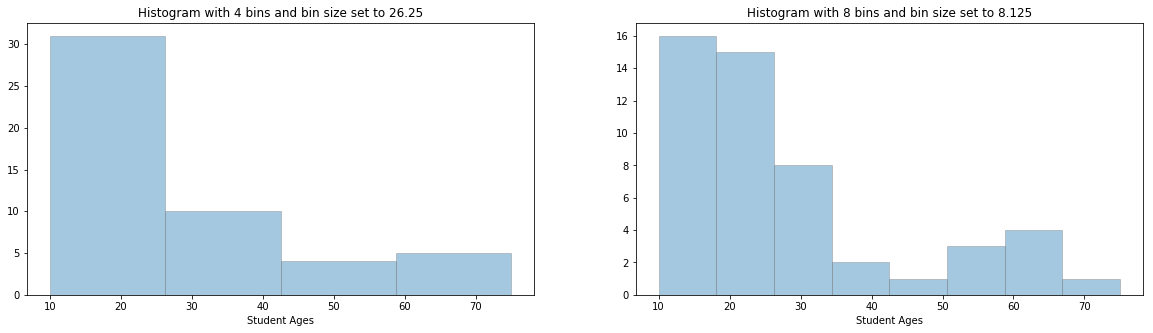

In [10]:
student_ages = pd.Series([15,19,18,14,13,
                          27,16,65,15,31,
                          22,15,24,22,51,
                          24,20,45,22,33,
                          24,27,18,66,15,
                          18,39,10,30,13,
                          19,28,53,28,65,
                          30,20,21,20,18,
                          20,23,18,41,52,
                          75,19,63,14,18],
                         name="Student Ages")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])
#plt.rcParams["patch.force_edgecolor"] = True
#ax1 = sns.distplot(x, hist_kws=dict(edgecolor="k", linewidth=2))
sns.distplot(student_ages, bins=4, kde=False, ax=ax1, hist_kws=dict(edgecolor="gray", linewidth=1))
ax1.set_title("Histogram with 4 bins and bin size set to 26.25")
sns.distplot(student_ages, bins=8, kde=False,ax=ax2, hist_kws=dict(edgecolor="gray", linewidth=1))
ax2.set_title("Histogram with 8 bins and bin size set to 8.125");

You can drag the widget below to choose the number of bins and see how it affects the histogram.

In [11]:
from ipywidgets import widgets
def f(bins):
    sns.distplot(student_ages, bins=bins, kde=False)
    plt.show();

widgets.interact(f, bins=(1,10,1));

interactive(children=(IntSlider(value=5, description='bins', max=10, min=1), Output()), _dom_classes=('widget-…

### Skewed Distributions

When counting frequencies it is quite common to have many data points for a certain range of values and much less for the rest of the values. When this happens we say the distribution is not symmetric but skewed. The data distribution can be either positively skewed or negatively skewed.

#### Positively Skewed Data

Positively skewed data, also known as skewed to the right data, is any data in which the distribution tails to the right of the highest frequency data point. For example, the majority of workers in a country, say 60% of all workers, might earn between $\$20,000$ and $\$40,000$ per year, while the remaining workers are spread out between $\$40,001$ and $\$200,000$, with only a few workers near the $\$200,000$ annual salary point.

As can be seen below, the age distribution in the student sample we used before is an example of a positively skewed distribution, where the majority of students are younger than 30 years, yet a few of them are considerably older than that.

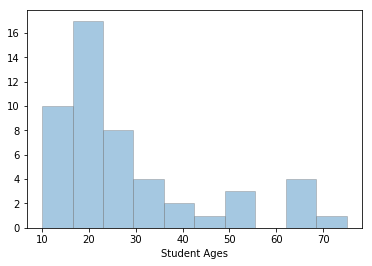

In [12]:
sns.distplot(student_ages, bins=10, kde=False, hist_kws=dict(edgecolor="gray", linewidth=1));

#### Negatively Skewed Data

Negatively skewed data, also known as skewed to the left data, is any data in which the distribution tails to the left of the highest frequency data point. For example, if we ask a sample of 50 workers what is their average commute time and plot the distribution it will be negatively skewed, with the majority of sampled workers taking say more than 30 minutes to make it to work and the remaining minority taking less.

Another example of a negatively skewed dataset would be the number of people who die in each age group in a specific year. Naturally, many more people die the older they become and so the distribution is skewed to the left, as can be seen below.

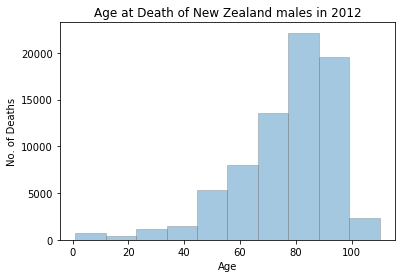

In [13]:
# Data for Age at Death of Australian Males in 2012. Ref: https://stats.stackexchange.com/a/122853
deaths_per_age = {1:565, 5:116, 10:69, 15:78, 20:319, 25:501, 30:633, 35:655, 40:848, 45:1226, 50:1633, 
                  55:2459, 60:3375, 65:4669, 70:6152, 75:7436, 80:9526, 85:12619, 90:12455, 95:7113, 100:2104, 110:241}
sns.distplot(list(deaths_per_age.keys()), bins=10, hist_kws={"weights":list(deaths_per_age.values()),"edgecolor": "gray", "linewidth":1}, kde=False)
plt.title("Age at Death of New Zealand males in 2012")
plt.ylabel("No. of Deaths")
plt.xlabel("Age");
hist_kws=dict()

## Summarizing a Distribution

To summarize the central tendency of a distribution of data, for example, the distribution of salaries for software engineers in a particular state or country, one can use any of the following statistical measures: mean, median or mode.

We will use the following small dataset to show through code the practical meaning of mean, median and mode.

In [14]:
sample_distribution = pd.Series([4,7,2,9,8,3,5,12,8,7,3,5,6,1,7,2,11])

### Mean

The sample mean, also commonly known as the average, is a sample statistic computed by summing up the values in the distribution 
and dividing by the number of samples present.

$$\bar x=\frac{\sum_{i=1}^nx_i}{n}$$

Where $n$ is the number of samples and $x_i$ is the value of the $i^{th}$ sample, for example, a salary from a survey response.

If we had all the values for the whole population, we could compute the population mean, $\mu$, a population parameter, as follows.

$$\mu=\frac{\sum_{i=1}^Nx_i}{N}$$

Where $N$ is the total number of items in the population and $x_i$ is the value of the $i^{th}$ population member.

In [15]:
printmd("**Mean: %.2f**" % (sample_distribution.mean()))

**Mean: 5.88**

### Median

The median of a distribution can be found by sorting the values and choosing the middle one. If the number of samples in the distribution is even, the median would be the average (mean) of the two numbers in the middle of the sorted sequence.

In [16]:
printmd("**%d samples in distribution.**" % (sample_distribution.count()))
print(sample_distribution.values)
printmd("**Sorted distribution**")
sorted_sample_distribution = sample_distribution.sort_values()
print(sorted_sample_distribution.values)
printmd("**Median: %d**" % (sample_distribution.median()))

**17 samples in distribution.**

[ 4  7  2  9  8  3  5 12  8  7  3  5  6  1  7  2 11]


**Sorted distribution**

[ 1  2  2  3  3  4  5  5  6  7  7  7  8  8  9 11 12]


**Median: 6**

The way the median is computed makes it robust to outliers and is therefore a more appropriate centrality measure when dealing with highly skewed distributions. Let us look at a quick code example to notice how outliers would affect the mean drastically but only change the median slightly.

In [17]:
salary_list = [30000, 32000, 33500, 28000, 29500, 35000, 40000]
salary_distribution = pd.Series(salary_list)
print(salary_distribution.values)
printmd("**No outliers: mean = %d, median = %d**" % (salary_distribution.mean(), salary_distribution.median()))

# Add an outlier to the salary_list with a value of 90000.
salary_list.append(90000)
salary_distribution = pd.Series(salary_list)
print(salary_distribution.values)
printmd("**One outlier of 90,000: mean = %d, median = %d**" % (salary_distribution.mean(), salary_distribution.median()))

[30000 32000 33500 28000 29500 35000 40000]


**No outliers: mean = 32571, median = 32000**

[30000 32000 33500 28000 29500 35000 40000 90000]


**One outlier of 90,000: mean = 39750, median = 32750**

### Mode

The mode is the value that occurs with the highest frequency in a distribution. In the sample distribution defined above, 7 is the most common number in the series and so the mode is 7.

In [18]:
printmd("**Mode: %d**" % (sample_distribution.mode()))

**Mode: 7**

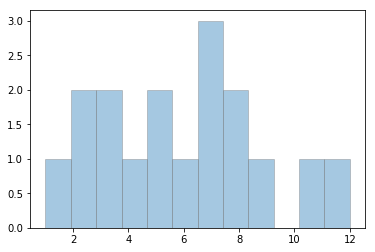

In [19]:
sns.distplot(sample_distribution, bins=12, kde=False, hist_kws=dict(edgecolor="gray", linewidth=1));

### Relation of Mean, Median and Mode in Skewed Distributions

#### Normal Distribution

In a normal distribution, the data is spread out symmetrically around the centre, mean value of 0. The mean value is also the most frequent and so it follows that both mode and median will be equal to the mean.

Let us look at an example by drawing first a thousand random samples and then a million random samples from a standard normal distribution, i.e. a distribution having $\mu=0$ and $\sigma=1$, and then plotting the histograms for each to compare the mean, median and mode.

**1,000 samples : Mean = 0.0584, Median = 0.0581**

**1,000,000 samples : Mean = 0.0004, Median = -0.0005**

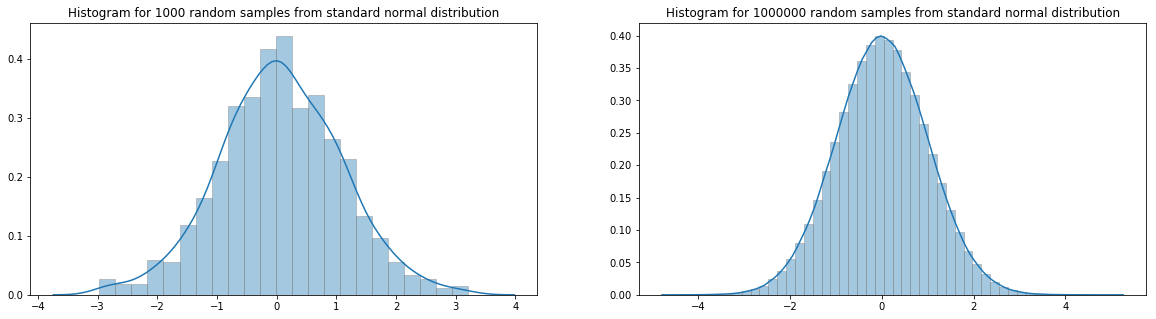

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])

mu, sigma = 0, 1
sample_1k_normal_distribution = pd.Series(np.random.normal(mu, sigma, 1000))
sample_1M_normal_distribution = pd.Series(np.random.normal(mu, sigma, 1000000))

sns.distplot(sample_1k_normal_distribution, ax=ax1,hist_kws=dict(edgecolor="gray", linewidth=1));
sns.distplot(sample_1M_normal_distribution, ax=ax2,hist_kws=dict(edgecolor="gray", linewidth=1));

printmd("**1,000 samples : Mean = %.4f, Median = %.4f**" % (sample_1k_normal_distribution.mean(), 
                                                         sample_1k_normal_distribution.median()))
ax1.set_title("Histogram for 1000 random samples from standard normal distribution")

printmd("**1,000,000 samples : Mean = %.4f, Median = %.4f**" % (sample_1M_normal_distribution.mean(), 
                                                         sample_1M_normal_distribution.median()))
ax2.set_title("Histogram for 1000000 random samples from standard normal distribution");

Notice how, the histogram for a million random samples, drawn on the right is more symmetric and closer to a proper standard normal distribution than the one drawn on the left, drawn using a thousand random samples. Since the mean, median and mode computed from the random samples are sample statistics, they estimate the actual standard normal distribution parameters.

Notice how the mean and median computed using a thousand samples are close to zero and do not match. However, the sample statistics computed using the million random samples match up and are equal to zero. This is because the more samples we have the closer the estimate gets to the real parameters.

### Variability (i.e. Spread)

The variability of a distribution is a measure that shows us how diverse the values sampled from a distrubtion will be. If a distribution has high variability, i.e. it has a wide spread, you may expect your samples to have quite different values, whereas if the distrubtion has a narrow spread, the majority of values will fluctuate around a specific value, most probably the mode value.

Let us look at a code example to generate two made up salary distributions, both based on a normal distribution, which however have very different variability.

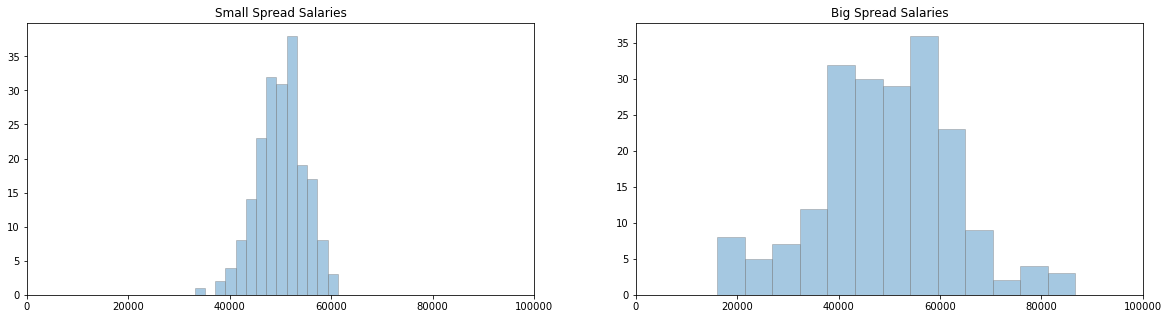

In [21]:
small_spread_salaries = pd.Series(np.random.normal(50000, 5000, 200))
big_spread_salaries = pd.Series(np.random.normal(50000, 15000, 200))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])
sns.distplot(small_spread_salaries, kde=False, ax=ax1,hist_kws=dict(edgecolor="gray", linewidth=1))
ax1.set_title("Small Spread Salaries")
ax1.set_xlim(0, 100000)
sns.distplot(big_spread_salaries, kde=False, ax=ax2,hist_kws=dict(edgecolor="gray", linewidth=1))
ax2.set_title("Big Spread Salaries")
ax2.set_xlim(0, 100000);

Both salary distributions have a mean salary of $50000, however the salary distribution on the right is more spread out than the one on the left. We can quantify this by determing the minimum and maximum salaries sampled from each distribution and computing the range as follows.

$$range = value_{max} - value_{min}$$

In [24]:
small_spread_range = small_spread_salaries.max() - small_spread_salaries.min()
big_spread_range = big_spread_salaries.max() - big_spread_salaries.min()

printmd("**Small spread salary distribution: Min value = %d, Max value = %d, Range = %d**" % (small_spread_salaries.min(),
                                                                                                 small_spread_salaries.max(),
                                                                                                 small_spread_range))

printmd("**Big spread salary distribution: Min value = %d, Max value = %d, Range = %d**" %(big_spread_salaries.min(),
                                                                                                 big_spread_salaries.max(),
                                                                                                 big_spread_range))

**Small spread salary distribution: Min value = 33078, Max value = 61261, Range = 28183**

**Big spread salary distribution: Min value = 16099, Max value = 86668, Range = 70569**

The **range** of a distribution changes only if new values that are either smaller than the existing minimum or larger than the existing maximum are added. The **range** metric is therefore very susceptible to outliers, i.e. extreme values. For instance, if in the small spread salary distribution we introduced a salary of $100,000, the range would become: 

In [26]:
printmd("**Small spread salary distribution range with 100,000 outlier: %d**" % (100000 - small_spread_salaries.min()))

**Small spread salary distribution range with 100,000 outlier: 66921**

Therefore, range might not accurately represent  the variability of data, especially if there are outliers.

### Interquartile Range (IQR)

Quartiles, as the name implies, split a distribution into four groups. Always starting from the minimum value, Q1 includes the first 25% of the data, Q2 the first 50% of the data, and Q3 the first 75% of the data.

With this in mind, the **IQR** represents 50% of the data centred around the median, 25% on each side. So the IQR starts at the Q1 point and ends at the Q3 point.

Boxplots help us visualise quartiles clearly and make it possible to statistically determine outliers as follows.

A data point is an outlier if it satisfies either one of these rules:

$$value < Q1 - (1.5 \times IQR)$$
$$value > Q3 + (1.5 \times IQR)$$

### Box Plot

As mentioned, box plots are a great way to summarise visually the variability or spread of a data set. Let us generate box plots for each of the sample salary data sets we generated previously.

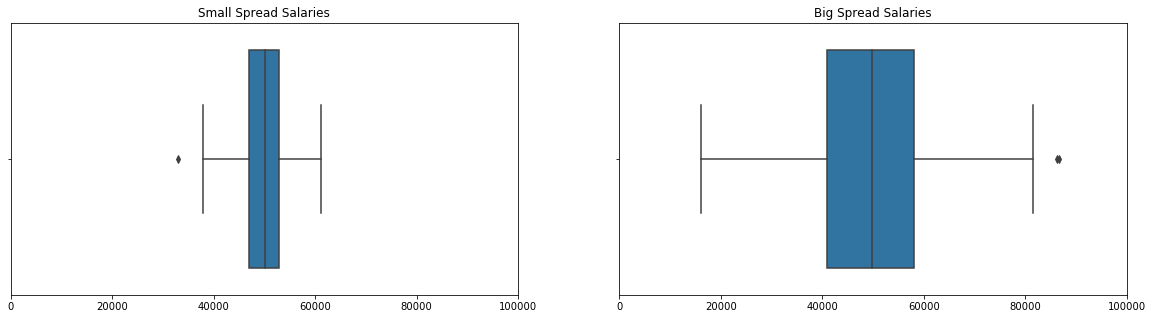

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])
sns.boxplot(small_spread_salaries, ax=ax1)
ax1.set_title("Small Spread Salaries")
ax1.set_xlim(0, 100000)
sns.boxplot(big_spread_salaries, ax=ax2)
ax2.set_title("Big Spread Salaries")
ax2.set_xlim(0, 100000);

Starting from the blue box in the middle, the left side is Q1, the right side is Q3 and the line in the middle of the box represents Q2, the median. The blue box is therefore the IQR, (Q3 - Q1). The vertical lines outside the box are called whiskers and these represent the minimum and maximum values beyond which a data point would be considered an outlier. Outlier points would be plotted individually.

From the above plots it is quite clear that the data set on the right has a larger variability since the blue box is much wider. This is also reflected in the fact that the whiskers are set much farther apart.

**Note:** When comparing visual plots always ensure you are comparing like with like, so always double-check that the axes ranges are equal between the plots you are comparing.

### Variance

Although quartiles and box plots give a good idea of variability, they do not summarise it perfectly. In fact, multiple distributions can have a very similar looking box plot.

A better statistical measure of variability is the variance which is computed by taking the difference between each data point and the mean value, squaring them up and summing them. The total sum is then divided by the number of data points. Mathematically the variance is represented by $\sigma^2$ and is computed using the following formula.

$$\sigma^2=\frac{\sum_{i=1}^{n}(x_i - \bar x)^2}{n}$$

### Standard Deviation

The computation of the variance finds the average squared difference between data points and the mean. Therefore, to get a better idea of the data variability, we need to take the square root of the variance to get a mean difference of the variability in the same unit as the variable $x$. This is called the standard deviation, $\sigma$, and is the most common measure of data variability.

Let us look at an example using ten salaries to compute and better understand variance and standard deviation.

In [28]:
salaries_people_on_social_network = np.array([38946, 43420, 49191, 50430, 50557, 52580, 53595, 54135, 60181, 62076])
mean_salary_for_people_on_social_network = salaries_people_on_social_network.mean()
printmd("**Mean salary for people on social network: %d**" % (mean_salary_for_people_on_social_network))
variance_computations = [((x - mean_salary_for_people_on_social_network)**2) for x in salaries_people_on_social_network]
printmd("**Squared differences:**")
print(variance_computations)
printmd("**Sum of squared differences = %.2f**" % (np.sum(variance_computations)))
variance = np.sum(variance_computations) / len(variance_computations)
printmd("**Variance = %.2f**" % (variance))
printmd("**Standard Deviation = %.2f**" % (np.sqrt(variance)))

**Mean salary for people on social network: 51511**

**Squared differences:**

[157881738.00999996, 65465899.20999998, 5382864.009999993, 1168777.209999997, 910306.8099999973, 1142547.2100000032, 4342639.2100000065, 6884851.210000007, 75167166.01000002, 111617112.01000004]


**Sum of squared differences = 429963900.90**

**Variance = 42996390.09**

**Standard Deviation = 6557.16**

Above, we broke the computations required to compute the variance and standard deviation into individual steps to make the process more clear. However, in practice we would use the built-in functions to compute the above in one step as follows.

In [29]:
# Set degrees of freedom to 0, so as to divide by n instead of (n-1), and so match previous computation.
printmd("**Standard Deviation = \$%.2f**" % (pd.Series(salaries_people_on_social_network).std(ddof=0)))

**Standard Deviation = \$6557.16**

### 100 Salaries Example

Let us use a data set made up of 100 sample salaries to summarise what we have learnt so far by plotting a histogram and box plot of the data set, calculating the mean salary, variance and standard deviation.

**Mean salary = \$50586.36**

**Variance = 114717818.36**

**Standard deviation = \$10656.95**

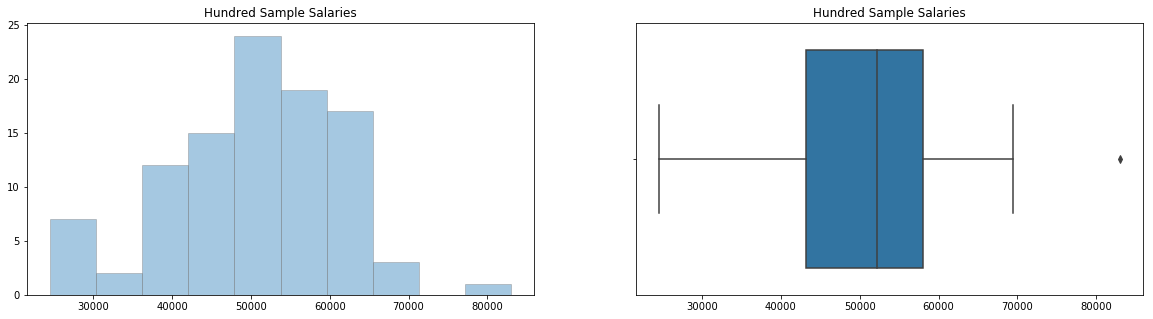

In [30]:
hundred_salaries = pd.Series([59147.29,61379.14,55683.19,56272.76,52055.88,47696.74,60577.53,49793.44,35562.29,58586.76,
                              47091.37,36906.96,53479.66,67834.74,53018.8,60375.11,36566.91,52905.58,51063.31,65431.26,
                              57071.83,30060.59,42619.62,52984.77,57871.28,41274.37,24497.78,47939.82,42755.52,57189.35,
                              37216.45,44742.99,47119.04,59269.48,53336.8,39719.54,69473.2,39831.55,58300.7,41726.66,
                              40283.35,59652.4,40326.61,28167.31,51420.36,55294.22,48116.14,36780.47,53628.89,48782.09,
                              33615.77,41881.34,64745.33,53482.58,48838.54,57031.73,62821.03,60627.78,46568.52,38977.05,
                              43250.62,67502.5,54696.18,43003.14,29156.83,61230.07,56749.93,48373.77,52428.26,29961.91,
                              54524.28,83017.28,49290.55,56375.66,64032.27,52947.6,61210.22,54438.94,48825.68,54118.71,
                              45305.73,42361.59,52852.52,62933.52,64330.23,48922.74,27211.96,62409.65,28981.92,64913.67,
                              55766,50748.04,43990.34,61828.33,45434.02,45369.16,54710.71,62222.43,44764.32,50973.48])

printmd("**Mean salary = \$%.2f**" % (hundred_salaries.mean()))
printmd("**Variance = %.2f**" % (hundred_salaries.var()))
printmd("**Standard deviation = \$%.2f**" % (hundred_salaries.std(ddof=0)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])
sns.distplot(hundred_salaries, kde=False, ax=ax1,hist_kws=dict(edgecolor="gray", linewidth=1))
ax1.set_title("Hundred Sample Salaries")
sns.boxplot(hundred_salaries, ax=ax2)
ax2.set_title("Hundred Sample Salaries");

### Usefulness of Standard Deviation

Using standard deviations on a standard normal distribution, where the mean equals the median and mode, we can accurately estimate how many data points fall within a certain range of values.

!["Standard Deviations Chart][std_dev_chart]

[std_dev_chart]: https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg "Standard Deviations Chart"
Source: https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg

For example, from the above chart we can see that 68.2% of all data will fall within the mean minus one standard deviation and the mean plus one standard deviation. Mathematically, this is expessed as $\mu \pm \sigma$. Within the $\mu \pm 2\sigma$ we find 95.4% of data and within $\mu \pm 3\sigma$ we find 99.6% of all data. This is known as the **68-95-99.7 rule**.

## Standardizing, Z Scores and Tables

We now know how to visualise a normal distribution and also summarize it through the parameters $\mu$ for mean and $\sigma$ for standard deviation. Using both parameters we can calculate how many standard deviations away from the mean a data point is on the standard normal distribution. This value is called the Z score and is found using the following equation.

$$Z = \frac{x - \mu}{\sigma}$$

If we processed all of the values in a data set using the above equation, we would end up with the standard normal distribution, which has $\mu=0$ and $\sigma=1$. From the Z score equation we can see why this is the case.

First, we are subtracting the mean of the data set from each value, thus the mean is shifted to zero in the new disribution.

Let $x = \mu$, then $Z = \frac{x - \mu}{\sigma} = \frac{\mu - \mu}{\sigma} = \frac{0}{\sigma} = 0$.

As regards the standard deviation, this is equal to one in the new distribution since we are dividing by $\sigma$.

Let $x = \mu + \sigma$, then $Z = \frac{x - \mu}{\sigma} = \frac{\mu + \sigma - \mu}{\sigma} = \frac{\sigma}{\sigma} = 1$

Let us look at a code example to see this standardizing process in practice and plot both the original data distribution and the resulting standard normal distribution. In this example, we will be using the `hundred_salaries` distribution we previously used.

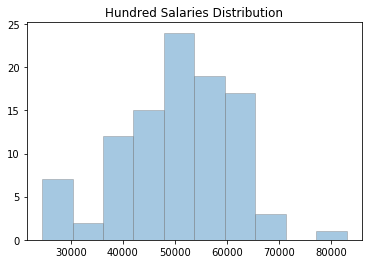

In [32]:
sns.distplot(hundred_salaries, kde=False,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("Hundred Salaries Distribution");

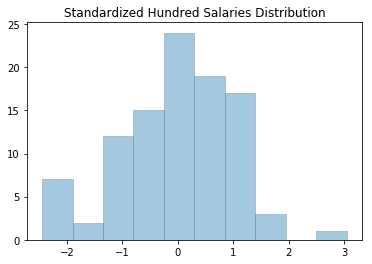

In [33]:
mu = hundred_salaries.mean()
sigma = hundred_salaries.std(ddof=0)
standardized_hundred_salaries = pd.Series([(x - mu)/sigma for x in hundred_salaries])
sns.distplot(standardized_hundred_salaries, kde=False, hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("Standardized Hundred Salaries Distribution");

Observe the mean of 0 in the standardized normal distribution.

### Using Z Scores and Z Tables

Z scores are pretty useful. Here we explore some common use cases, but before we do that we need to talk about continuous distributions. So far, we have always looked at discrete distributions and visualised them using histograms. In a histogram, the bin size or width affects the shape of the histogram. The larger the bin size the less detail about the underlying distribution we keep. On the other hand if the bin size is made too small, there is too much detail and we still lose sight of the actual distribution of data. Take a look at the following histograms for the same `hundred_salaries` distribution, increasing the bin size from left to right.

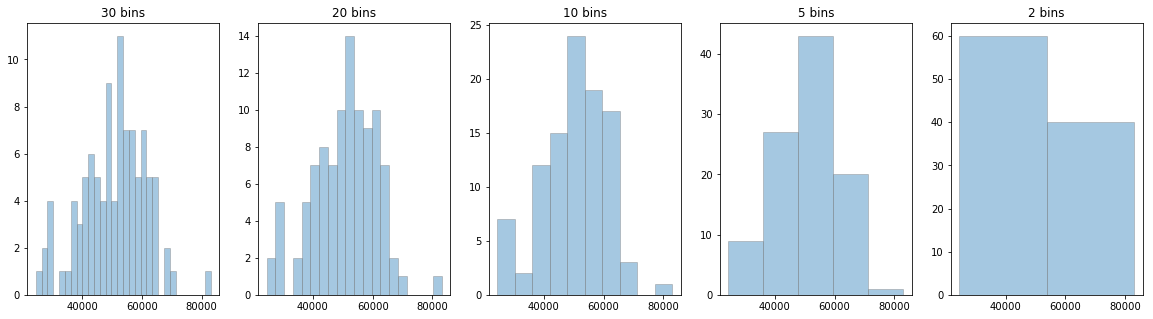

In [34]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 5])
sns.distplot(hundred_salaries, bins=30, kde=False, ax=ax1,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("30 bins")
sns.distplot(hundred_salaries, bins=20, kde=False, ax=ax2,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("20 bins")
sns.distplot(hundred_salaries, bins=10, kde=False, ax=ax3,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("10 bins")
sns.distplot(hundred_salaries, bins=5, kde=False, ax=ax4,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("5 bins")
sns.distplot(hundred_salaries, bins=2, kde=False, ax=ax5,hist_kws=dict(edgecolor="gray", linewidth=1)).set_title("2 bins");

Furthermore, the bin size restricts us to computing relative likelihood for a specific range that matches with the bin sizes. If we need to compute a relative likelihood for a range that does not match up with the bin borders, we are out of luck.

Continuous distributions solve this issue by defining a distribution equation that in turn allows us to compute relative likelihoods using infinitesimally small bin sizes, through the use of integration. In this notebook we will not go into this any further, but for anyone interested in learning more you can start by reading about the normal distribution and the Gaussian probability density function [here](https://en.wikipedia.org/wiki/Normal_distribution).

Luckily for us, based on the standard normal distribution, a table, named a [Z table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf), was computed that allows us to read off the relative likelihood by looking up Z scores. We will look into how the Z table is used in one of the use cases below.

### Determine Likelihood of a Value

Z scores make it possible to figure out whether a value is an exceptional occurence, meaning it occurs with very low probability. For example, imagine a worker earns \\$65000 annually and the mean annual salary in this example population is \\$50000. Is this worker's salary exceptional? It is hard to say without also knowing the standard deviation. If the standard deviation is \\$5000 that salary would be exceptionaly high, however, if standard deviation is \\$20000, then \\$65000 would be quite normal. The Z score combines both mean and standard deviation into a single metric that makes it clear if a data point is rare or not. The further the Z score is from zero, both positive or negative, the less likely is the event. In our previous example, the Z scores for the 5000 standard deviations would be the following.

$$Z = \frac{x - \mu}{\sigma} = \frac{65000 - 50000}{5000} = 3$$

Such a large z value suggests that it is quite unlikely to have a base salary of 65,000 when the average is 50,000 and the standard deviation is 5000. Specifically,

In [35]:
import scipy.stats as st
print(st.norm.pdf(3))

0.0044318484119380075


0.4% chance of such a salary.

On the contrary, if the average salary is still 50,000 but the standard deviation is 20,000, a salary of 65,000 is not an outlier.

$$Z = \frac{x - \mu}{\sigma} = \frac{65000 - 50000}{20000} = 0.75$$

In [36]:
print(st.norm.pdf(0.75))

0.30113743215480443


That is, 30% chance for such an outcome.

### Compare Values From Different Normal Distributions

Computing the likelihood of values from different distributions is trivial using statistics. For example, Jack has 54 Twitter followers and the Twitter population parameters are $\mu = 208$ and $\sigma = 60$. Susan has 63 Facebook friends and the Facebook population parameters are $\mu = 190$ and $\sigma = 36$. Who is the least popular of the two? Assume that the operational definition of the popularity construct is the number of followers or friends. At first glance, one might say Jack is the least popular of the two, 54 followers to Susan's 63 Facebook friends. However, to make the comparison meaningful we have to standardize both distributions to compare their respective Z scores. Doing this we find the following:

$$Z_{Jack} = \frac{x - \mu}{\sigma} = \frac{54 - 208}{60} = -2.5667$$

$$Z_{Susan} = \frac{x - \mu}{\sigma} = \frac{63 - 190}{36} = -3.5278$$

It now becomes clear that Susan is less popular than Jack. Her Z score is farther away from zero than Jack's, which means that on the Facebook platform having such a low number of friends as Susan's is highly unlikely, more than for Jack to have 54 followers on Twitter.

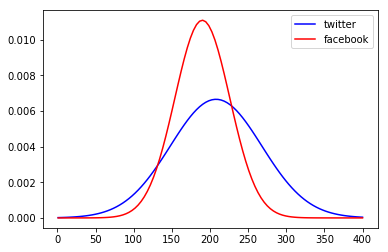

In [37]:
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
twitterPopulation = scipy.stats.norm(208,60)
facebookPopulation = scipy.stats.norm(190, 36)
x = np.linspace(1, 400, 100)

plt.plot(x, twitterPopulation.pdf(x), color='blue',label="twitter");
plt.plot(x, facebookPopulation.pdf(x), color='red',label="facebook");
plt.legend()

We can compute the specific probabilities of each normal distribution.

In [38]:
print(twitterPopulation.pdf(54)) # Probability of user having 54 followers In Twitter
print(facebookPopulation.pdf(63)) # Probability of user having 63 followers in Facebook

0.00024674084459377145
2.1986861306448278e-05


So Susan is less popular than Jack.

We can also take the ratio of the 2 probabilities.

In [39]:
twitterPopulation.pdf(54)/facebookPopulation.pdf(63)

11.22219498066364

That is, it is 11 times more likely to have 54 followers in twitter than 63 followers in Facebook.

## Determine Percent of Values Less Than or Greater Than a Value

let's describe an imaginary country where the average household income is \\$60,000 (with a standard Deviation of \\$20,000

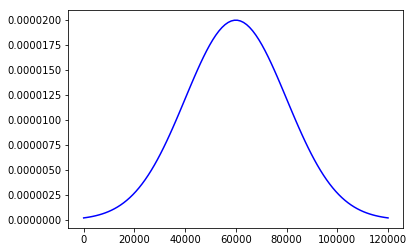

In [40]:
import matplotlib.pyplot as plt
income = scipy.stats.norm(60000, 20000)
x = np.linspace(1, 120000, 100)
plt.plot(x, income.pdf(x), color='blue');

What percentage of households of that country make less than $80,000 per year? The answer is easy if we use the cumulative distribution function. The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x.

<img src="./images/cdf.png" alt="Drawing" style="width: 400px;"/>

In [41]:
income.cdf(80000)

0.8413447460685429

That is, 84% of households in that country had an income a year below $80,000. 

What percentage of the households make more than $100,000 per year?

In [42]:
1-income.cdf(80000)

0.15865525393145707

What percentage of households have an income between 40,000 and 80,000 per year?

In [43]:
income.cdf(80000)-income.cdf(40000)

0.6826894921370859

## Sampling Distributions

In this last section, we will now learn about one of the most important theorems in probability, the central limit theorem.

Informally, the central limit theorem states that no matter the type of distribution a population has, whether it is uniform, bimodal, skewed, normal and so on, if we take a sample of size $n$ from that population and compute the sample mean, and repeat this process over and over again, the distribution of sample means will be a normal distribution. The more sample means are included, the more the distribution converges towards a normal distribution.

So in brief, the central limit theorem states that:

1. The distribution of sample means is approximately normal.
2. The mean of the sample means is equal to the mean of the underlying population, $\mu$, and is known as the expected value.
3. The standard deviation of the sample means is $\approx \frac{\sigma}{\sqrt{n}}$ where $n$ is the sample size. This is known as the standard error.

Let us look at a code example to see the above in practice.

### Facebook Friends - Positively Skewed Distribution Example

In this example we will show how a positively skewed data set will still produce a distribution of sample means that is approximately normal, as expected according to the central limit theorem.

**Note:** We will treat the facebook friends data set as though it is a population and not a sample.

**Facebook friends population parameters: $\mu =$ 205.49, $\sigma = $ 237.74**

**Sample means distributions**

**200 samples, $n = 5$**

Theoretical: $\mu  = 205.49$ , $SE = \frac{\sigma}{\sqrt{n}} = \frac{237.74}{\sqrt{5}} = 106.32$

In practice: $\mu  = 203.70$ , $SE = 99.18$

**200 samples, $n = 25$**

Theoretical: $\mu  = 205.49$ , $SE = \frac{\sigma}{\sqrt{n}} = \frac{237.74}{\sqrt{25}} = 47.55$

In practice: $\mu  = 203.88$ , $SE = 49.52$

**200 samples, $n = 50$**

Theoretical: $\mu  = 205.49$ , $SE = \frac{\sigma}{\sqrt{n}} = \frac{237.74}{\sqrt{50}} = 33.62$

In practice: $\mu  = 207.75$ , $SE = 32.73$

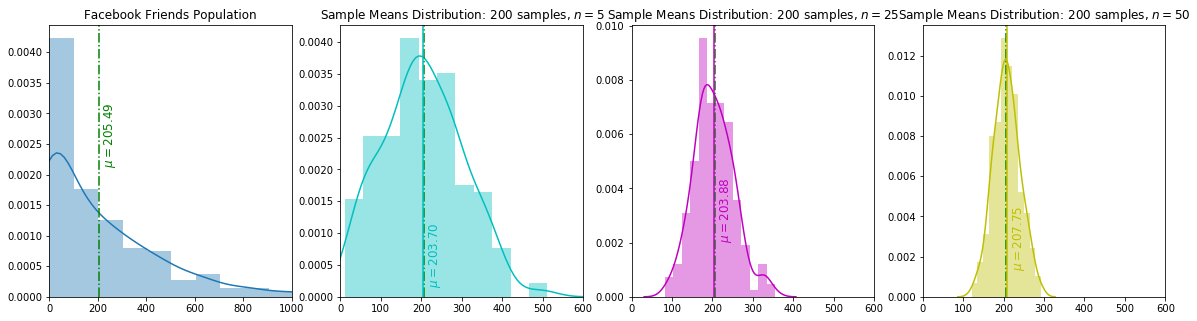

In [44]:
facebook_friends = pd.Series([372,0,51,116,0,40,50,201,56,185,150,288,224,381,40,465,258,27,0,331,605,295,
                              0,346,282,124,18,110,60,634,120,115,0,0,0,0,0,0,500,139,0,420,270,254,362,209,
                              178,70,345,212,406,123,0,513,0,517,14,40,305,0,0,206,0,60,6,250,200,200,40,0,
                              0,0,0,437,308,0,0,932,0,643,1014,101,80,300,735,103,103,220,25,0,0,779,0,0,634,
                              157,259,0,0,780,0,0,0,0,656,550,821,246,0,0,181,575,203,0,381,0,0,0,0,303,386,0,
                              465,150,208,102,0,100,0,275,1109,182,120,283,1000,637,134,500,0,446,463,50,296,
                              10,298,486,0,836,136,136,0,0,0,0,0,0,830,40,290,488,643,298,182,-1,206,345,108,
                              40,601,331,123,0,30,72,200,116,369,0,55,200,200,184,114,0,18,1,440,40,0,0,0,345,
                              400,150,420,500,345,106,531,406,72,213,213,4,125,643,0,0,432,0,0,0,185])

printmd("**Facebook friends population parameters: $\mu =$ %.2f, $\sigma = $ %.2f**" % (facebook_friends.mean(),
                                                                                        facebook_friends.std(ddof=0)))

def generate_sample_means(population, samples, sample_size):
    sample_means = []
    for _ in range(samples):
        samples = np.random.choice(population, size=sample_size)
        sample_means.append(samples.mean())
    return pd.Series(sample_means)


sample_means_200_5 = generate_sample_means(facebook_friends, 200, 5)
sample_means_200_25 = generate_sample_means(facebook_friends, 200, 25)
sample_means_200_50 = generate_sample_means(facebook_friends, 200, 50)

printmd("**Sample means distributions**")
printmd("**200 samples, $n = 5$**")
printmd("Theoretical: $\mu  = %.2f$ , $SE = \\frac{\sigma}{\sqrt{n}} = \\frac{%.2f}{\sqrt{5}} = %.2f$" % 
        (facebook_friends.mean(), facebook_friends.std(ddof=0), facebook_friends.std(ddof=0)/np.sqrt(5)))
printmd("In practice: $\mu  = %.2f$ , $SE = %.2f$" % (sample_means_200_5.mean(), sample_means_200_5.std(ddof=0)))

printmd("**200 samples, $n = 25$**")
printmd("Theoretical: $\mu  = %.2f$ , $SE = \\frac{\sigma}{\sqrt{n}} = \\frac{%.2f}{\sqrt{25}} = %.2f$" % 
        (facebook_friends.mean(), facebook_friends.std(ddof=0), facebook_friends.std(ddof=0)/np.sqrt(25)))
printmd("In practice: $\mu  = %.2f$ , $SE = %.2f$" % (sample_means_200_25.mean(), sample_means_200_25.std(ddof=0)))

printmd("**200 samples, $n = 50$**")
printmd("Theoretical: $\mu  = %.2f$ , $SE = \\frac{\sigma}{\sqrt{n}} = \\frac{%.2f}{\sqrt{50}} = %.2f$" % 
        (facebook_friends.mean(), facebook_friends.std(ddof=0), facebook_friends.std(ddof=0)/np.sqrt(50)))
printmd("In practice: $\mu  = %.2f$ , $SE = %.2f$" % (sample_means_200_50.mean(), sample_means_200_50.std(ddof=0)))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[20,5])

ax1.set_xlim(0, 1000)
ax2.set_xlim(0, 600)
ax3.set_xlim(0, 600)
ax4.set_xlim(0, 600)

sns.distplot(facebook_friends, ax=ax1).set_title("Facebook Friends Population")
ax1.axvline(facebook_friends.mean(), linestyle="-.", color="g")
ax1.text(facebook_friends.mean() + 10, 0.003, "$\mu=%.2f$" % (facebook_friends.mean()), fontsize=12, rotation=90, color="g")

sns.distplot(sample_means_200_5, ax=ax2, color="c").set_title("Sample Means Distribution: 200 samples, $n = 5$")
ax2.axvline(facebook_friends.mean(), linestyle="-.", color="g")
ax2.axvline(sample_means_200_5.mean(), linestyle="-", color="c")
ax2.text(sample_means_200_5.mean() + 10, 0.001, "$\mu=%.2f$" % (sample_means_200_5.mean()), fontsize=12, rotation=90, color="c")

sns.distplot(sample_means_200_25, ax=ax3, color="m").set_title("Sample Means Distribution: 200 samples, $n = 25$")
ax3.axvline(facebook_friends.mean(), linestyle="-.", color="g")
ax3.axvline(sample_means_200_25.mean(), linestyle="-", color="m")
ax3.text(sample_means_200_25.mean() + 10, 0.004, "$\mu=%.2f$" % (sample_means_200_25.mean()), fontsize=12, rotation=90, color="m")

sns.distplot(sample_means_200_50, ax=ax4, color="y").set_title("Sample Means Distribution: 200 samples, $n = 50$")
ax4.axvline(facebook_friends.mean(), linestyle="-.", color="g")
ax4.axvline(sample_means_200_50.mean(), linestyle="-", color="y")
ax4.text(sample_means_200_50.mean() + 10, 0.004, "$\mu=%.2f$" % (sample_means_200_50.mean()), fontsize=12, rotation=90, color="y");

Notice that the facebook friends population plot on the left is skewed to the right, positively skewed, since the majority of people have under 200 friends not a few users of Facebook have a lot of "friends".

The other three density plots, moving from left to right, are sample mean distributions using 200 samples with a sample size of 5, 25 and 50, respectively. Notice how the distributions are approximately normal and the larger the sample size, the smaller the standard error and thus the spread of the distribution becomes narrower.